In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 10000)

In [2]:
# Load in the dataset
df = pd.read_excel("eletronic_sales.xlsx")
df.head()

,Date,Branch,Sales Agent,Products,Units,Price
0,2014-09-01,Woji,Chinedu,Apple,2,125.00
1,2015-06-17,Woji,Emeka,Apple,5,125.00
2,2015-09-10,Woji,Ibrahim,Lenovo,7,1.29
3,2015-11-17,Woji,Tolu,HP,11,4.99
4,2015-10-31,Woji,Tonye,Lenovo,14,1.29


In [3]:
## What makes a dirty data?
# Missing values

# Duplicates
# inconsistent data columns
# wrong datatype ....>to change datatypes we use ".astype()" ----> to check datatypes we use "dtypes"
# incomplete data

## Why do we need to clean data? We clean data to ensure
# --->Data integrity, accuracy and consistency---->


## Data anaysis pipeline
#1. ETL (Extract, Transform and Load)
#2. creating data model for visualization
#3. building dashboard
#4. Reporting and presentation

## Data Science pipeline
#1. Preliminary analysis
#2. EDA Exploratory data analysis
#3. Data cleaning
#4. Analysis(Data Wrangling)
#5. Data preprocessing and data mining
#6. Building your model(prediction, forcasting, classification, clustering)
#7. Reporting and visualization
#8. Deployment
#9. Maintenance and monitoring
#10.Support and troubleshooting
#----> Please note that from step2 to step5 is an iterative process that is dependent on step 6. Step 6 itself could also be iterative

In [4]:
# View a snapshot of your dataset
df.head()

,Date,Branch,Sales Agent,Products,Units,Price
0,2014-09-01,Woji,Chinedu,Apple,2,125.00
1,2015-06-17,Woji,Emeka,Apple,5,125.00
2,2015-09-10,Woji,Ibrahim,Lenovo,7,1.29
3,2015-11-17,Woji,Tolu,HP,11,4.99
4,2015-10-31,Woji,Tonye,Lenovo,14,1.29


In [5]:
# Do a little bit of feature engineering

# add revenue column
# To create a new column, you start with creating the new columns as a variable name

# units X price = Revenue
# units * price = Revenue

df["Revenue"] = df["Units"] * df["Price"]

#  Round(parameter,2)
df["Revenue(N)"] = round(df["Units"] * df["Price"] * 1000,2)

**Feature Engineering**
* Explanation:

Feature Engineering- This means 3 things, one is useful here and the other two for machine learning. Feature engineering in this context, has to do with creating a new feature or column by combining, extracting or simply doing calculation on an existing column or feature.

In [6]:
# view to see if the changes has been effected
df.head()

,Date,Branch,Sales Agent,Products,Units,Price,Revenue,Revenue(N)
0,2014-09-01,Woji,Chinedu,Apple,2,125.00,250.00,250000.0
1,2015-06-17,Woji,Emeka,Apple,5,125.00,625.00,625000.0
2,2015-09-10,Woji,Ibrahim,Lenovo,7,1.29,9.03,9030.0
3,2015-11-17,Woji,Tolu,HP,11,4.99,54.89,54890.0
4,2015-10-31,Woji,Tonye,Lenovo,14,1.29,18.06,18060.0


In [7]:
# let check data types
df.dtypes

Date           datetime64[ns]
Branch                 object
Sales Agent            object
Products               object
Units                   int64
Price                 float64
Revenue               float64
Revenue(N)            float64
dtype: object

In [8]:
# lets convert the date column to datatime
# Using "pd.to_datetime()"function

# to_datatime()

# datetime()
df["Date"] = pd.to_datetime(df["Date"])

In [9]:
# lets check our data types
df.dtypes

Date           datetime64[ns]
Branch                 object
Sales Agent            object
Products               object
Units                   int64
Price                 float64
Revenue               float64
Revenue(N)            float64
dtype: object

<Axes: xlabel='Data Types', ylabel='Count'>

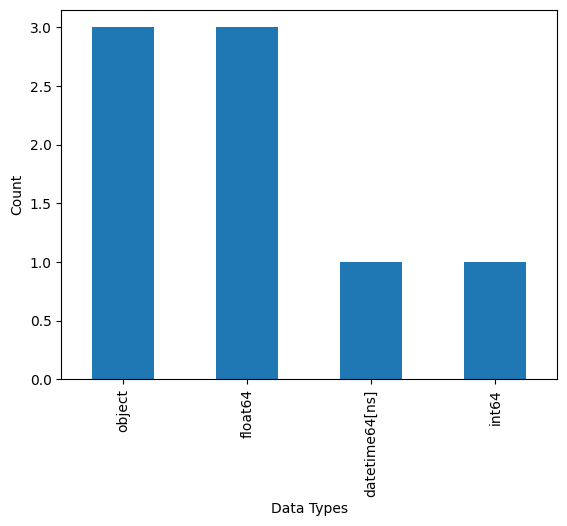

In [10]:
# lets just plot this, its not important though.
df.dtypes.value_counts().plot(kind="bar", xlabel= "Data Types", ylabel= "Count")

In [11]:
# Lets do more feature engineering

# lets work on our datetime to extract the month, year and week name
# Using ".dt.year",".dt.month_name()",".day_name()"

df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month_name()
df["Day"] = df['Date'].dt.day_name()

In [12]:
# df.drop('week', axis=11, inplace=True)
df.head()

,Date,Branch,Sales Agent,Products,Units,Price,Revenue,Revenue(N),Year,Month,Day
0,2014-09-01,Woji,Chinedu,Apple,2,125.00,250.00,250000.0,2014,September,Monday
1,2015-06-17,Woji,Emeka,Apple,5,125.00,625.00,625000.0,2015,June,Wednesday
2,2015-09-10,Woji,Ibrahim,Lenovo,7,1.29,9.03,9030.0,2015,September,Thursday
3,2015-11-17,Woji,Tolu,HP,11,4.99,54.89,54890.0,2015,November,Tuesday
4,2015-10-31,Woji,Tonye,Lenovo,14,1.29,18.06,18060.0,2015,October,Saturday


#2.0 Steps to Analysis
**Note:** This is after you have followed the ETL(Extract Transform Load) frame work, this is you importing your dataset, cleaning and preparing it for analysis

### A. Work on the KPI's (Key performance index of this data)
1. Total units sold
2. Total Revenue
3. Average Revenue per unit
4. Numbers of products
5. Numbers of Sales Agents

### B. Work on the insights by creating models(Note that creating models in data analysis is different from building models in machine learning)
1. Total monthly revenue by Year
2. Total revenue by branch
3. Total revenue by products
4. Total revenue by sales agent
5. Total revenue by week
6. Total revenue by month
7. Trends of sales

### C. Build your dash board
1. Add the title of your analysis.
2. Add the business/company
3. Add your KPI's
4. Add Charts with appropriate labelling
5. Add your slicer if you are working with streamlit or excel or PowerBi or Tableau to make your dashboard interactive(if not, exclude it)

### C. Report your insights
1. Start with the an executive summary briefly explaining what you and briefly introducing the KPI's.
2. Explain your insights in a narative and relatable way using your visuals.

### D. Make recommendation
1. What should the business owner to increase monthly sales
2. Which of the brannches should be given more attention
3. Which products should be removed from the stock, which products should be purchased more
4. Which of the sales agents should be given more incentives/promoted to sales managers position

##A. Work on the KPI's (Key performance index of this data)

In [13]:
# 1. Total units sold
Total_goods_sold = df["Units"].sum()
print(f"Total goods sold: {Total_goods_sold}")

Total goods sold: 2121


In [14]:
# 2. Total revenue
Total_revenue = df["Revenue(N)"].sum()
print(f"Total revenue: N{Total_revenue}")

Total revenue: N19627880.0


In [15]:
# 3. Average Revenue per unit
# using "round()function to approximate to 2 decimal place2
Average_revenue_per_unit = round(Total_revenue / Total_goods_sold, 2)
print(f"Average Revenue per unit: N{Average_revenue_per_unit}")

Average Revenue per unit: N9254.07


In [16]:
# 4. Numbers of products
# using the .nunique() shows the numbers of unique values
Numbers_of_products = df["Products"].nunique()
print(f"Numbers of product: {Numbers_of_products}")

Numbers of product: 5


In [17]:
# 5. Numbers of Sales agents
numbers_of_sales_agents = df["Sales Agent"].nunique()
print(f"Numbers of Sales Agents: {numbers_of_sales_agents}")

Numbers of Sales Agents: 11


##B. work on the insights by creating models and plotting their charts.

In [18]:
# Set index using the data column
df.set_index("Date", inplace=True)
df.head()

,Branch,Sales Agent,Products,Units,Price,Revenue,Revenue(N),Year,Month,Day
Date,,,,,,,,,,
2014-09-01,Woji,Chinedu,Apple,2,125.00,250.00,250000.0,2014,September,Monday
2015-06-17,Woji,Emeka,Apple,5,125.00,625.00,625000.0,2015,June,Wednesday
2015-09-10,Woji,Ibrahim,Lenovo,7,1.29,9.03,9030.0,2015,September,Thursday
2015-11-17,Woji,Tolu,HP,11,4.99,54.89,54890.0,2015,November,Tuesday
2015-10-31,Woji,Tonye,Lenovo,14,1.29,18.06,18060.0,2015,October,Saturday


Class Task1: Calculate the Total Monthly revenue for year 2015 and plot the chart using 3 visualization packages in python

In [19]:
df.Year.unique()

array([2014, 2015], dtype=int32)

In [20]:
sales_2015 = df[df["Year"] == 2015]

In [21]:
# 1.  Filtering
# 2. Grouping
# 3. Visuals

# lets start analysing this dataset for insights

# 1. Monthly revenue in 2015

# step1: Filter for 2015

sales_2015 = df[df['Year'] == 2015]
sales_2015.head()

,Branch,Sales Agent,Products,Units,Price,Revenue,Revenue(N),Year,Month,Day
Date,,,,,,,,,,
2015-06-17,Woji,Emeka,Apple,5,125.00,625.00,625000.0,2015,June,Wednesday
2015-09-10,Woji,Ibrahim,Lenovo,7,1.29,9.03,9030.0,2015,September,Thursday
2015-11-17,Woji,Tolu,HP,11,4.99,54.89,54890.0,2015,November,Tuesday
2015-10-31,Woji,Tonye,Lenovo,14,1.29,18.06,18060.0,2015,October,Saturday
2015-12-21,Woji,Tonye,HP,28,4.99,139.72,139720.0,2015,December,Monday


In [22]:
# Step2:
# I am using the .sort_index() to arrangement is done base on the index
Total_monthly_revenue = sales_2015.groupby("Month")["Revenue(N)"].sum().sort_index()
Total_monthly_revenue

Month
April         610380.0
August       1830900.0
December     2018780.0
February     1324960.0
January       413540.0
July          996330.0
June          625000.0
March         389430.0
May           787570.0
November       54890.0
October      1157490.0
September     160270.0
Name: Revenue(N), dtype: float64

In [23]:
# I am using the .sort_value() to arrange the output, so the arrangement is done base on the values
Total_monthly_revenue = sales_2015.groupby("Month")["Revenue(N)"].sum().sort_values(ascending=False)
Total_monthly_revenue

Month
December     2018780.0
August       1830900.0
February     1324960.0
October      1157490.0
July          996330.0
May           787570.0
June          625000.0
April         610380.0
January       413540.0
March         389430.0
September     160270.0
November       54890.0
Name: Revenue(N), dtype: float64

<Axes: xlabel='Month', ylabel='Revenue(N)'>

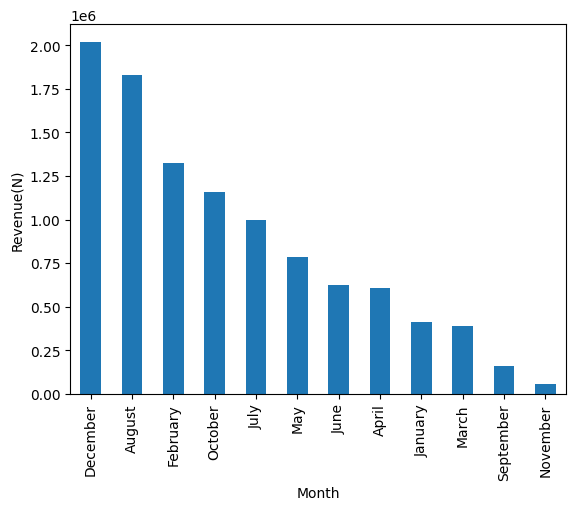

In [24]:
# lets put this in a plot using pandas
Total_monthly_revenue.plot(kind = "bar", xlabel = "Month", ylabel = "Revenue(N)")

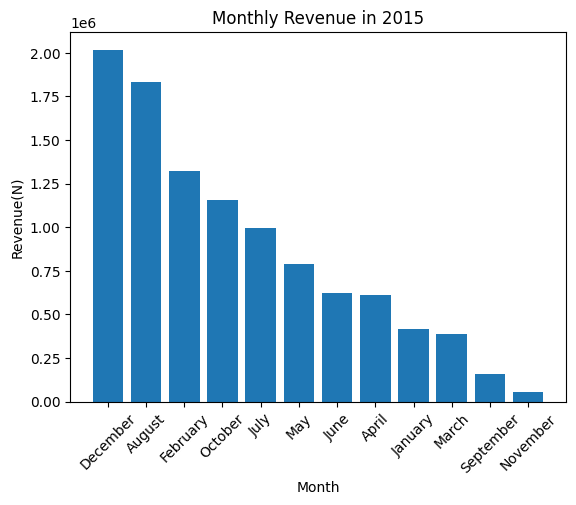

In [25]:
# lets use mattplotlib
plt.bar(Total_monthly_revenue.index, Total_monthly_revenue.values)
plt.xlabel("Month")
plt.ylabel("Revenue(N)")
plt.title("Monthly Revenue in 2015")
plt.xticks(rotation = 45)
plt.show()

Student Task1: Follow the same step and calculate the monthly revenue for 2014 and plot that charts using the 3 visualization packages in python.

In [26]:
sales_2014 = df[df["Year"] == 2014]
sales_2014.head()

,Branch,Sales Agent,Products,Units,Price,Revenue,Revenue(N),Year,Month,Day
Date,,,,,,,,,,
2014-09-01,Woji,Chinedu,Apple,2,125.00,250.00,250000.0,2014,September,Monday
2014-02-26,Woji,Ibrahim,Compaq,27,19.99,539.73,539730.0,2014,February,Wednesday
2014-10-05,Woji,George,HP,28,8.99,251.72,251720.0,2014,October,Sunday
2014-02-09,Woji,Tolu,Lenovo,36,4.99,179.64,179640.0,2014,February,Sunday
2014-01-23,Woji,Emeka,HP,50,19.99,999.50,999500.0,2014,January,Thursday


In [27]:
Total_monthly_revenue_2014 = sales_2014.groupby('Month')['Revenue(N)'].sum().sort_values(ascending=False)
Total_monthly_revenue_2014

Month
July         1676900.0
December     1269690.0
January      1188550.0
June          988500.0
October       827080.0
November      778890.0
February      719370.0
May           512780.0
September     505840.0
April         448650.0
August        174650.0
March         167440.0
Name: Revenue(N), dtype: float64

<Axes: xlabel='Month', ylabel='Revenue(N)'>

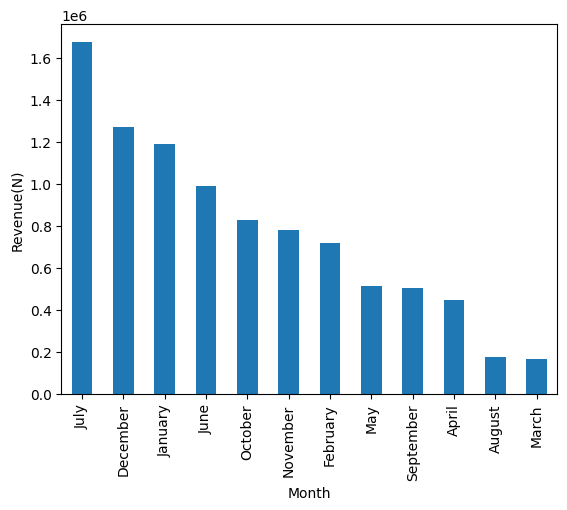

In [28]:
# ploting using pandas
Total_monthly_revenue_2014.plot(kind="bar", xlabel="Month", ylabel="Revenue(N)")

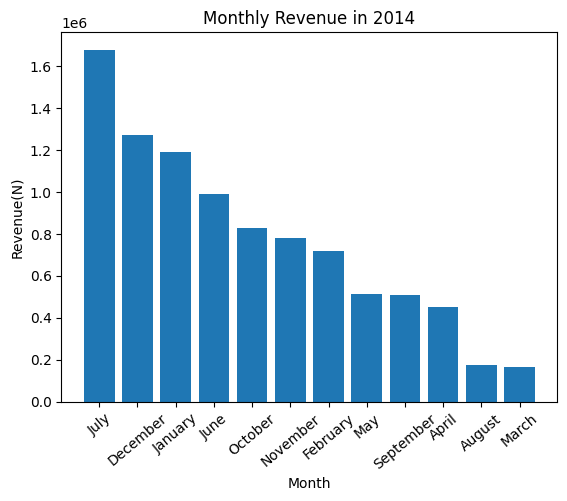

In [29]:
# ploting with plt
plt.bar(Total_monthly_revenue_2014.index, Total_monthly_revenue_2014.values)
plt.xlabel("Month")
plt.ylabel("Revenue(N)")
plt.title("Monthly Revenue in 2014")
plt.xticks(rotation = 40)
plt.show()

In [30]:
# 2. Total revenue by branch

# let check the branches we have first
df["Branch"].unique()

array(['Woji', 'GRA', 'Town'], dtype=object)

In [31]:
Total_revenue_by_branch = df.groupby("Branch")["Revenue(N)"].sum().sort_values(ascending=False)
Total_revenue_by_branch

Branch
Woji    11139070.0
GRA      6002090.0
Town     2486720.0
Name: Revenue(N), dtype: float64

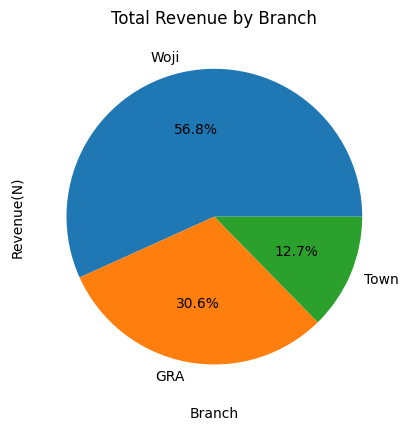

In [32]:
# plot the chart for Total Revenue by branch using matplotlib
plt.pie(Total_revenue_by_branch.values, labels=Total_revenue_by_branch.index, autopct='%1.1f%%')
plt.xlabel("Branch")
plt.ylabel("Revenue(N)")
plt.title("Total Revenue by Branch")
plt.show()

In [33]:
# Total revenue by products
# lets check the products available first
df["Products"].unique()

array(['Apple', 'Lenovo', 'HP', 'Compaq', 'Dell'], dtype=object)

In [34]:
Total_revenue_by_product = df.groupby("Products")["Revenue(N)"].sum().sort_values(ascending=False)
Total_revenue_by_product

Products
HP        9577650.0
Dell      4169870.0
Lenovo    2135140.0
Compaq    2045220.0
Apple     1700000.0
Name: Revenue(N), dtype: float64

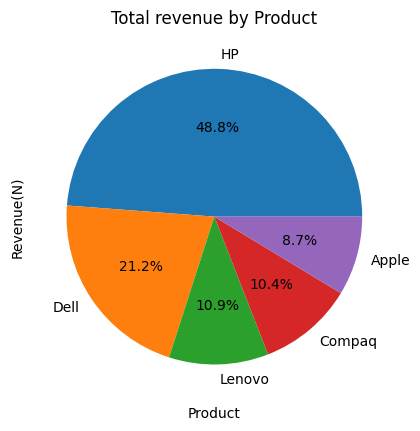

In [35]:
# lets plot
plt.pie(Total_revenue_by_product.values, labels=Total_revenue_by_product.index, autopct='%1.1f%%')
plt.xlabel("Product")
plt.ylabel("Revenue(N)")
plt.title("Total revenue by Product")
plt.show()

In [36]:
# 3. Total revenue by sales agent

# Lets check who our sales agents are
df["Sales Agent"].unique()

array(['Chinedu', 'Emeka', 'Ibrahim', 'Tolu', 'Tonye', 'George',
       'Blessing', 'Chioma', 'Torbari', 'Uche', 'Tunde'], dtype=object)

In [37]:
Total_revenue_by_sales_agent = df.groupby("Sales Agent")["Revenue(N)"].sum().sort_values(ascending=False)
Total_revenue_by_sales_agent

Sales Agent
Emeka       3109440.0
Chioma      3102300.0
Tolu        2812190.0
Blessing    2363040.0
Ibrahim     1749870.0
Chinedu     1641430.0
George      1387770.0
Uche        1283610.0
Tunde       1203110.0
Torbari      536750.0
Tonye        438370.0
Name: Revenue(N), dtype: float64

<Axes: ylabel='Sales Agent'>

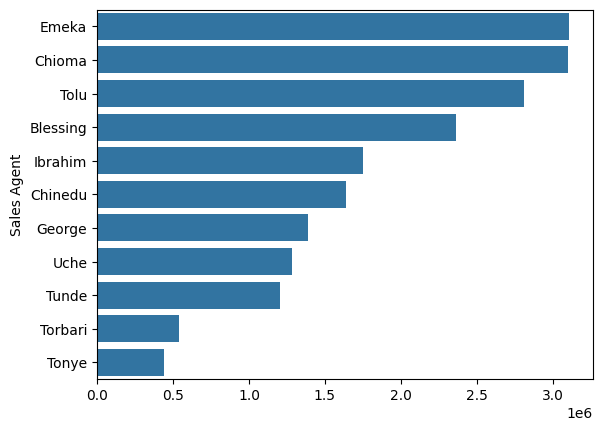

In [38]:
# lets plot using seaborn barchart
sns.barplot(x = Total_revenue_by_sales_agent.values, y = Total_revenue_by_sales_agent.index, orient="h")

In [46]:
#4. Total revenue by week
Total_revenue_by_week = df.groupby("Day")["Revenue(N)"].sum().sort_values(ascending=False)
Total_revenue_by_week

Day
Monday       3515170.0
Friday       3426630.0
Tuesday      3388970.0
Wednesday    3348580.0
Sunday       3146200.0
Thursday     1809960.0
Saturday      992370.0
Name: Revenue(N), dtype: float64

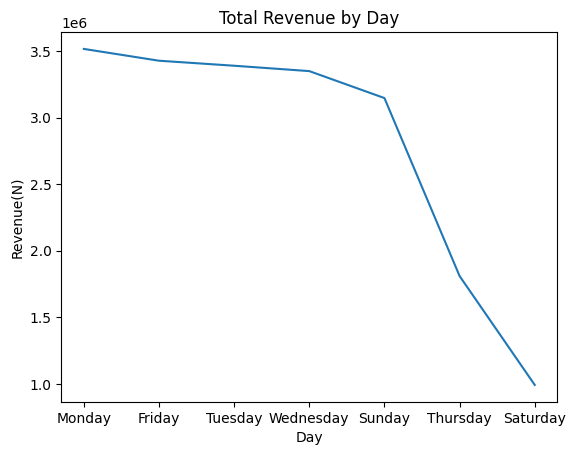

In [47]:
# lets plot this using line chart
plt.plot(Total_revenue_by_week.index, Total_revenue_by_week.values)
plt.xlabel("Day")
plt.ylabel("Revenue(N)")
plt.title("Total Revenue by Day")
plt.show()

In [48]:
# 5. Total revenue by month
Total_revenue_by_month = df.groupby("Month")["Revenue(N)"].sum().sort_values(ascending=False)
Total_revenue_by_month

Month
December     3288470.0
July         2673230.0
February     2044330.0
August       2005550.0
October      1984570.0
June         1613500.0
January      1602090.0
May          1300350.0
April        1059030.0
November      833780.0
September     666110.0
March         556870.0
Name: Revenue(N), dtype: float64

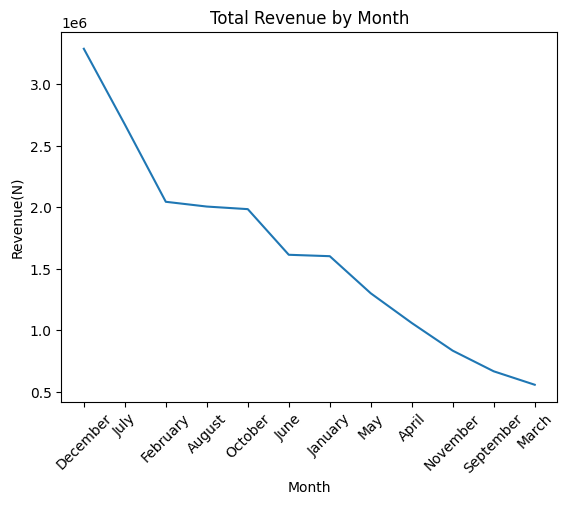

In [50]:
# plot using searborn line chart
sns.lineplot(x = Total_revenue_by_month.index, y = Total_revenue_by_month.values)
plt.xlabel("Month")
plt.ylabel("Revenue(N)")
plt.xticks(rotation = 45)
plt.title("Total Revenue by Month")
plt.show()

In [ ]:
# 6. Trends of sales
Trends_of_sales_over_the_year = df.groupby(["Year", "Month"])["Revenue(N)"].sum().reset_index()
Trends_of_sales_over_the_year

,Year,Month,Revenue(N)
0,2014,April,448650.0
1,2014,August,174650.0
2,2014,December,1269690.0
3,2014,February,719370.0
4,2014,January,1188550.0
5,2014,July,1676900.0
6,2014,June,988500.0
7,2014,March,167440.0
8,2014,May,512780.0
9,2014,November,778890.0


Text(0, 0.5, 'Revenue(N)')

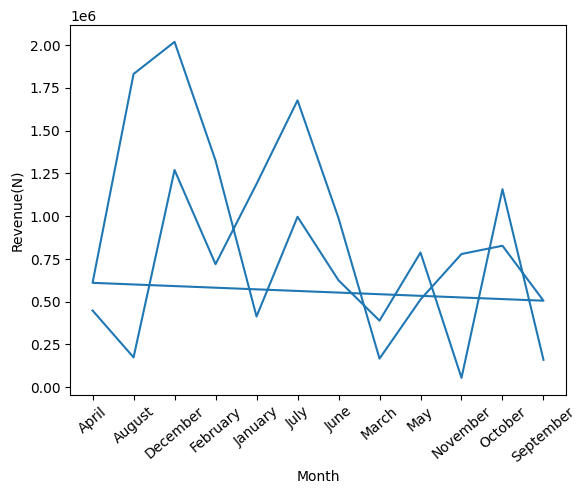

In [ ]:
# lets plot
plt.plot(Trends_of_sales_over_the_year["Month"], Trends_of_sales_over_the_year["Revenue(N)"])
plt.xticks(rotation = 40)
plt.xlabel('Month')
plt.ylabel('Revenue(N)')